In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Cleaning Dataframe</h1>

In [13]:
df = pd.read_csv('CSV_Files/Raw_House_details.csv')
#df.to_csv('CSV_Files/Raw_House_details.csv', index=False)

Get the lay of the land of the Dataframe

In [14]:
df.nunique()

Type of property                25
Location                      1561
postal code                    929
immo code                     8570
Price                         1357
Address                       1762
Bedrooms                        24
Energy class                    13
Primary energy consumption    1001
Furnished                        2
Terrace                          2
Terrace surface                128
Surface of the plot           1649
Living room surface            105
Number of frontages              9
Construction year              164
Building condition               7
Outdoor parking space            1
Bathrooms                       14
Shower rooms                    16
Office                           2
Toilets                         16
Kitchen type                     9
Heating type                     8
province                        11
dtype: int64

In [15]:
df.shape

(8570, 25)

In [16]:
df.head()

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
0,house,essen,2910,10666428,469000.0,Heidestatiestraat 26,3,D,390.0,0,...,0,0,0,1,0,0,2,Installed,0,Antwerp
1,house,bierges,1301,10666426,1395000.0,"Rue de Wavre, 27",5,C,178.0,0,...,1988,Good,0,2,3,1,4,Hyper equipped,Fuel oil,Walloon Brabant
2,apartment,arlon,6700,10666424,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
3,house,arlon,6700,10666423,285000.0,Avenue de Longwy 340,2,D,299.0,0,...,0,Good,0,2,0,0,2,Installed,Electric,Luxembourg (shared with Eastern Hainaut)
4,apartment,antwerp,2000,10666422,425000.0,"Grote steenweg, 511",2,C,254.0,0,...,0,As new,0,1,0,0,0,Installed,0,Antwerp


Remove any missing values, strings and characters in the Price column that do not show sheer numeric value

In [17]:

df =df.replace({'€':'','\€':'','\)':'','\.':''},regex=True) 

In [18]:

df = df[df['Price'].notnull() & (df['Price'] != '')]

In [19]:
# Remove all strings from the column

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#converts the values from 'Price' to numeric type and those that are not numeric value converts to NaN. 
#Further dropped by dropna
df = df.dropna(subset=['Price'])

Replace any 'yes' or 'no' with binary numbers

In [20]:
replace_dataframe={'Yes':1,'No':0}
columns_to_convert=['Furnished','Terrace','Office']

df[columns_to_convert]=df[columns_to_convert].replace(replace_dataframe)

Remove the Outdoor parking space as the only result was 0

In [21]:
df =df.drop('Outdoor parking space', axis=1) 

In [22]:
round(df['Price'].describe())

count        8570.0
mean       464969.0
std       1011255.0
min            16.0
25%        239000.0
50%        335000.0
75%        479000.0
max      43900000.0
Name: Price, dtype: float64

In [23]:
df.shape

(8570, 24)

In [24]:
df = df.drop(df['Price'].nlargest(10).index)

In [25]:
df = df.drop(df['Price'].nsmallest(100).index)

In [26]:
df['Price'].min()

25000.0

In [27]:
df.shape

(8460, 24)

In [28]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [29]:
df.to_csv('CSV_Files/House_details.csv', index=False)

In [30]:
df.sort_values(by='Price',ascending=False).head()  # not df.head() as it will only give the first view of teh dataframe and that is then sorted

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
2983,house,knokke-zoute,8300,10658623,6495000.0,Kustlaan 277,5,B,125.0,0,...,4,2008,As new,4,0,1,5,Hyper equipped,Gas,West Flanders
8398,exceptional-property,knokke-heist,8300,10643422,6385000.0,Albert plein 10,4,D,357.0,0,...,4,0,Good,4,4,1,0,Installed,Fuel oil,West Flanders
4474,villa,knokke,8300,10654776,5850000.0,Dumortierlaan 89,7,NS,0.0,0,...,0,0,0,6,0,0,0,0,0,West Flanders
2381,house,knokke-heist,8300,10660118,5650000.0,Albert plein 10,6,A,74.0,0,...,4,2020,As new,3,2,0,3,USA hyper equipped,0,West Flanders
2984,house,knokke-heist,8300,10658622,5650000.0,Kustlaan 277,6,A,74.0,0,...,4,2020,As new,3,0,0,4,Hyper equipped,Gas,West Flanders


Inspect how many missing values are there in the dataframe

In [31]:
df.isnull().sum()

Type of property                0
Location                        0
postal code                     0
immo code                       0
Price                           0
Address                         0
Bedrooms                        0
Energy class                    0
Primary energy consumption      0
Furnished                       0
Terrace                         0
Terrace surface                 0
Surface of the plot             0
Living room surface             0
Number of frontages             0
Construction year               0
Building condition              0
Bathrooms                       0
Shower rooms                    0
Office                          0
Toilets                         0
Kitchen type                    0
Heating type                    0
province                      158
dtype: int64

In [32]:
#df = df[df.iloc[:, -1].astype(str).str.strip() != '']

df.dropna(subset=['province'], inplace=True)  # dropping missing values in column province

In [33]:
df.isnull().sum()

Type of property              0
Location                      0
postal code                   0
immo code                     0
Price                         0
Address                       0
Bedrooms                      0
Energy class                  0
Primary energy consumption    0
Furnished                     0
Terrace                       0
Terrace surface               0
Surface of the plot           0
Living room surface           0
Number of frontages           0
Construction year             0
Building condition            0
Bathrooms                     0
Shower rooms                  0
Office                        0
Toilets                       0
Kitchen type                  0
Heating type                  0
province                      0
dtype: int64

In [34]:
#df.to_csv('CSV_Files/House_details.csv', index=False)

In [62]:

df['Energy class'] = df['Energy class'].replace(['NS','G_F','C_B','G_A++','G'],0)
df['Energy class'] = df['Energy class'].replace('A++','A+')
df['Energy class'].unique()

array(['D', 'C', 0, 'E', 'F', 'B', 'A', 'A+'], dtype=object)

<h1>Visualisation</h1>

**What is the correlation between the corresponding variables?**

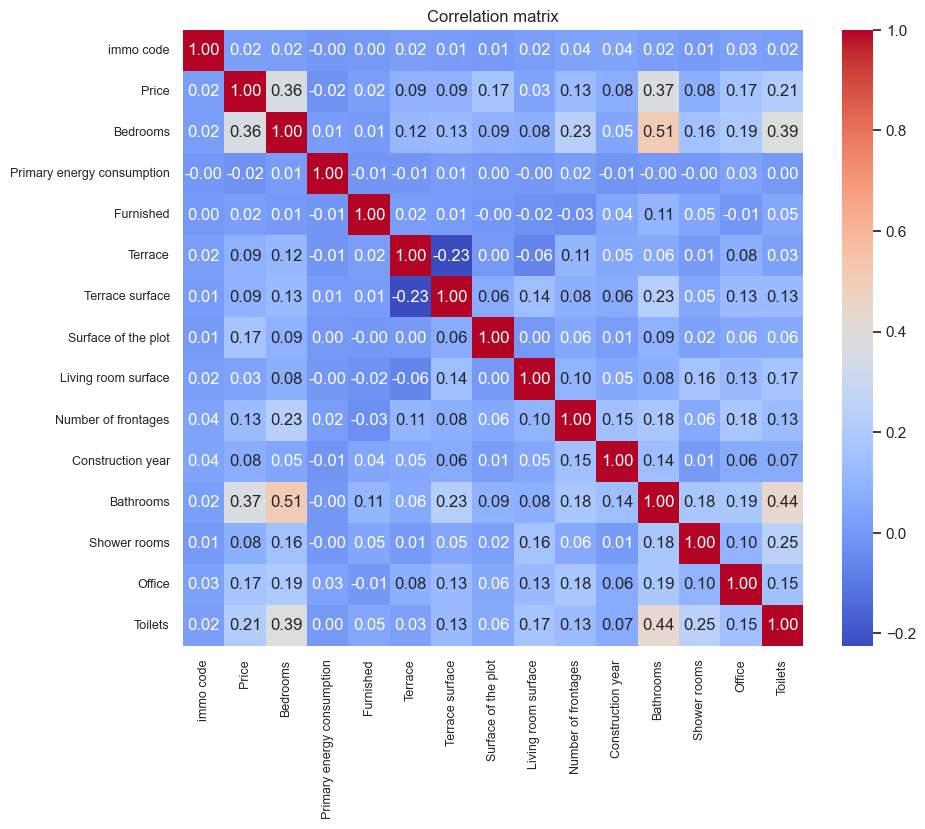

In [63]:
correlation_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.title('Correlation matrix')

plt.show()

**Provide a scatterplot between the price and construction year**

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

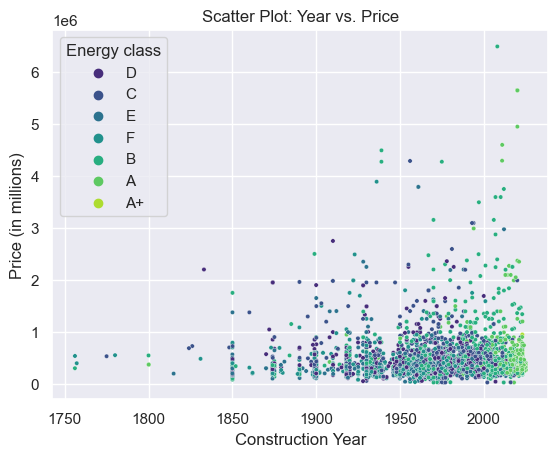

In [68]:



filtered_Construction_df = df[df['Construction year'] != 0]
filtered_Energy_df = df[df['Energy class'] != 0]


years = filtered_Construction_df['Construction year']
prices = df['Price']
categories = filtered_Energy_df['Energy class']


jitter = np.random.uniform(low=-0.1, high=0.1, size=len(years))
jittered_years = years + jitter


sns.set(style='darkgrid')


sns.scatterplot(x=jittered_years, y=prices, hue=categories, palette='viridis', s=10)


plt.xlabel('Construction Year')
plt.ylabel('Price (in millions)')
plt.title('Scatter Plot: Year vs. Price')

plt.colorbar(label='Bedrooms')

# Display the plot
plt.show()



In [65]:
df.sort_values(by='Bedrooms',ascending=False)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,province
7521,other-property,brussels,1000,10646056,915000.0,Place du champ de Mars 5,60,0,0.0,0,...,3,0,Good,0,0,0,0,0,0,Brussels Capital Region
1917,exceptional-property,knesselare,9910,10661999,4235000.0,Wiezeplein 13,30,B,139.0,0,...,4,0,0,0,0,1,0,0,Gas,East Flanders
377,apartment-block,bruxelles,1000,10666538,329400.0,Rue Defacqz 40,27,F,342.0,1,...,4,1986,As new,27,2,1,2,USA hyper equipped,Electric,Brussels Capital Region
1129,apartment-block,ixelles,1050,10664217,329400.0,Rue Defacqz 40,27,F,342.0,1,...,4,1986,As new,27,2,1,2,USA hyper equipped,Electric,Brussels Capital Region
7530,apartment-block,brussels,1000,10646041,4200000.0,Place du champ de Mars 5,22,0,0.0,0,...,2,0,Just renovated,0,0,0,0,0,0,Brussels Capital Region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,new-real-estate-project-apartments,beveren,9120,10665558,459000.0,Stationsstraat 97,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,East Flanders
5586,apartment,tienen,3300,10651905,160000.0,Waaibergstraat 92,0,D,324.0,0,...,3,1994,To be done up,0,0,0,0,0,Gas,Flemish Brabant
701,new-real-estate-project-apartments,sint-gillis-waas,9170,10665573,399500.0,Stationsstraat 97,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,East Flanders
5578,loft,braine-le-comte,7090,10651941,695000.0,Grand Place 8,0,0,0.0,0,...,2,1905,0,0,0,0,0,Installed,0,Hainaut (West
